In [1]:
import scipy.ndimage as ndimage
import numpy as np
from matplotlib import pyplot as plt
from utils import load_data, _to_float
import gsm

In [18]:
Mz = np.array([[[0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0],
                [0, -1, 0, 1, 0],
                [0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0]],
               
               [[0, 0, 0, 0, 0],
                [0, -1, 0, 1, 0],
                [0, -3, 0, 3, 0],
                [0, -1, 0, 1, 0],
                [0, 0, 0, 0, 0]],
               
               [[0, -1, 0, 1, 0],
                [0, -3, 0, 3, 0],
                [0, -8, 0, 8, 0],
                [0, -3, 0, 3, 0],
                [0, -1, 0, 1, 0]],
               
               [[0, 0, 0, 0, 0],
                [0, -1, 0, 1, 0],
                [0, -3, 0, 3, 0],
                [0, -1, 0, 1, 0],
                [0, 0, 0, 0, 0]],
               
               [[0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0],
                [0, -1, 0, 1, 0],
                [0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0]]])

In [28]:
My = np.rot90(Mz, 1, (2, 1))
Mx = np.rot90(Mz, 1, (2, 0))

In [48]:
Myz1 = np.array([[[0, 0, 0, 0, 0],
                 [0, -1, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0]],
                
                [[0, 0, 0, 0, 0],
                 [0, -3, -1, 0, 0],
                 [0, -1, 0, 1, 0],
                 [0, 0, 1, 3, 0],
                 [0, 0, 0, 0, 0]],
       
                [[0, 0, -1, 0, 0],
                 [0, -8, -3, 0, 0],
                 [-1, -3, 0, 3, 1],
                 [0, 0, 3, 8, 0],
                 [0, 0, 1, 0, 0]],
       
                [[0, 0, 0, 0, 0],
                 [0, -3, -1, 0, 0],
                 [0, -1, 0, 1, 0],
                 [0, 0, 1, 3, 0],
                 [0, 0, 0, 0, 0]],
       
                [[0, 0, 0, 0, 0],
                 [0, -1, 0, 0, 0],
                 [0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0]]])

In [69]:
Mxy1 = np.rot90(Myz1, 1, (2, 0))
Mxz1 = np.rot90(Myz1, 1, (1, 0))
Myz2 = np.rot90(Myz1, 1, (2, 1))
Mxy2 = np.rot90(Myz1, 1, (0, 2))
Mxz2 = np.rot90(Myz1, 1, (0, 1))

In [77]:
Mxyz = np.array([[[]]])

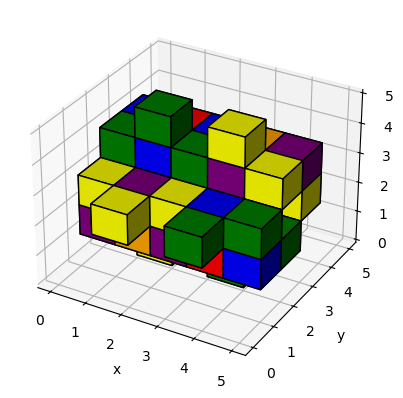

In [78]:
M = Mxy1
ax = plt.figure().add_subplot(projection='3d')
colors = np.empty(M.shape, dtype=object)
colors[M == 8] = 'red'
colors[M == 3] = 'blue'
colors[M == 1] = 'green'
colors[M == -1] = 'yellow'
colors[M == -3] = 'purple'
colors[M == -8] = 'orange'
colors[M == 0] = 'gray'
ax.voxels(M, facecolors=colors, edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [2]:
file_path_img_r = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_1620proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'
file_path_img_m = '../../samples/Catec_Two_PlateIQI_20um/Catec_Two_PlateIQI_20um_810proj_220kV_Rayscan-SimCT_800x800x1000_16bit.raw'
# Data loading
img_r = load_data(file_path_img_r, data_range=255, normalize=True, batch=False)
img_m = load_data(file_path_img_m, data_range=255, normalize=True, batch=False)

In [3]:
img_r = _to_float(img_r)
img_m = _to_float(img_m)

In [4]:
metric_gsm_m = gsm.GSM(data_range=255)
metric_gsm_m.score(img_r, img_m)
metric_gsm_m.print_score(2)

TypeError: type numpy.ndarray doesn't define __round__ method